In [1]:
import numpy as np
import pandas as pd
from tp2_aux import *
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import adjusted_rand_score

In [2]:
df=pd.read_csv("Features/18_feat.csv")
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-1.559896,0.409851,0.241041,0.001002,-0.187459,0.115386,-0.046990,0.179574,-16.046017,-1.091255,0.450222,4.131803,-1.301603,0.556241,0.576700,-0.218884,0.012953,1.356094
1,-1.091979,-0.413773,0.502309,0.331394,1.165290,0.920334,-0.332307,2.005451,-0.135757,0.800398,-0.496265,-0.306147,-1.157694,-0.330854,-0.001787,0.425239,0.557592,0.842823
2,-1.891114,-0.140439,0.337118,0.042957,0.026543,-0.958797,-0.406260,0.396285,-0.468747,1.302132,-0.352623,-1.182071,-1.816678,0.048479,0.746181,-0.117663,-0.347074,1.148108
3,-1.098008,-0.411514,-0.385895,-0.413756,-0.283129,-0.048777,-0.517242,-0.287146,-0.047558,-0.351189,-0.953673,-0.379331,-0.847357,-0.361026,1.030350,0.427081,-0.516452,0.078780
4,-1.706336,-0.704539,-0.103978,0.262728,0.206327,0.286878,-0.244355,0.372937,-0.191213,0.851725,-0.926571,-0.039155,-1.443298,-0.474006,0.298786,-0.005844,0.522534,1.030714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,0.763250,-1.106307,2.129527,0.102888,0.468838,-0.494128,0.344354,-0.317797,-0.304486,-0.865017,0.797914,1.102743,1.001457,0.407000,1.910801,0.226307,0.818548,-0.870239
559,-1.439961,0.703030,0.993426,0.822937,-0.930051,3.337929,-0.661596,-0.452449,-0.683022,-0.525432,-0.506534,0.419618,-1.644708,0.651041,0.296426,-0.352501,0.316008,0.609599
560,-1.600709,-0.540742,0.843239,0.626511,0.102256,0.662468,0.151771,0.409728,-0.642098,1.549894,-1.023916,0.202998,-1.678440,0.020790,0.223419,0.306023,0.360273,1.532186
561,0.199144,-0.905646,1.697900,0.296623,-1.678511,-2.148101,-0.112111,-1.571106,0.493952,-0.150569,0.806492,-0.264024,1.236618,-0.118960,1.436553,-0.555722,-0.463581,-0.324735


In [3]:
labels=np.loadtxt("labels.txt",delimiter=",")
df["labels"]=labels[:,1].astype(int)


In [21]:
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,labels
25,-1.002604,-1.397988,-0.820913,0.017675,-0.237732,-1.031347,-0.651335,0.281807,0.635680,-0.237696,-1.237255,0.302899,-0.701500,-0.828911,0.845280,0.500606,-1.173676,-0.360468,1
87,-0.261251,0.449861,-2.293847,0.432998,-0.560208,-0.382202,0.353884,0.536526,0.026689,-0.528644,0.056572,-1.265613,-0.282787,-0.988175,-1.110526,-0.050947,-1.002296,-0.690446,1
98,-0.736167,-0.754851,-0.921335,0.248251,1.219902,0.405406,-0.005169,0.955647,-0.475584,0.653254,0.254872,0.320372,-0.559839,-1.020603,-0.009006,0.275812,0.650697,-1.031347,1
105,-0.330326,0.227009,-1.492477,1.127795,-0.048673,0.887678,0.135715,-0.432002,0.274224,-0.947295,-0.740083,-0.878862,-0.553378,-0.470254,-1.405789,0.881003,-0.361964,0.270596,2
106,-0.324545,-1.587188,-1.064375,0.728657,0.059596,-0.134341,0.136092,-0.582722,0.682304,0.220122,-1.076076,0.769471,-0.009267,-1.385454,0.249999,0.881061,-0.639661,-1.653300,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
536,1.339142,-0.442747,1.621848,1.795248,1.209739,-2.465714,0.615537,-1.070161,1.004604,-0.383301,0.921920,0.137367,1.296522,1.010347,-0.294965,3.174630,1.050821,-1.088588,1
538,1.133379,-0.996474,1.982738,-0.882036,1.531292,-0.387656,-0.220970,-0.207129,-0.348615,-1.203314,0.661953,0.679319,1.291079,0.637255,1.055490,1.049245,3.263913,-1.230098,1
544,1.430036,0.018328,1.518319,-2.964923,2.362387,-0.445195,-0.299730,-0.643814,0.019078,-1.487308,0.028441,0.821664,1.442314,0.984489,0.658044,-1.262470,3.986046,-1.842014,2
554,1.449299,1.137328,2.491004,0.386379,-0.145024,-2.505219,-0.094543,0.168394,-0.633461,-1.709849,0.200916,-0.003597,1.401828,2.540308,0.919473,1.552780,-0.630825,0.586183,2


### Feature Selection (ANOVA F-Test)

In [4]:

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_new = SelectKBest(f_classif, k=6).fit_transform(X, y) #5 features, might change depending on results


In [22]:
df_ufilter=df.iloc[:,[0,1,2,7,12,13]]
df_all=df.iloc[:,[0,1,2,7,12,13]]
df_ufilter

,0,1,2,7,12,13
25,-1.002604,-1.397988,-0.820913,0.281807,-0.701500,-0.828911
87,-0.261251,0.449861,-2.293847,0.536526,-0.282787,-0.988175
98,-0.736167,-0.754851,-0.921335,0.955647,-0.559839,-1.020603
105,-0.330326,0.227009,-1.492477,-0.432002,-0.553378,-0.470254
106,-0.324545,-1.587188,-1.064375,-0.582722,-0.009267,-1.385454
...,...,...,...,...,...,...
536,1.339142,-0.442747,1.621848,-1.070161,1.296522,1.010347
538,1.133379,-0.996474,1.982738,-0.207129,1.291079,0.637255
544,1.430036,0.018328,1.518319,-0.643814,1.442314,0.984489
554,1.449299,1.137328,2.491004,0.168394,1.401828,2.540308


In [6]:
df_ufilter["label"]=y
df_ufilter=df_ufilter[df_ufilter["label"]!=0]
df_ufilter

/opt/anaconda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,0,1,2,7,12,13,label
25,-1.002604,-1.397988,-0.820913,0.281807,-0.701500,-0.828911,1
87,-0.261251,0.449861,-2.293847,0.536526,-0.282787,-0.988175,1
98,-0.736167,-0.754851,-0.921335,0.955647,-0.559839,-1.020603,1
105,-0.330326,0.227009,-1.492477,-0.432002,-0.553378,-0.470254,2
106,-0.324545,-1.587188,-1.064375,-0.582722,-0.009267,-1.385454,1
...,...,...,...,...,...,...,...
536,1.339142,-0.442747,1.621848,-1.070161,1.296522,1.010347,1
538,1.133379,-0.996474,1.982738,-0.207129,1.291079,0.637255,1
544,1.430036,0.018328,1.518319,-0.643814,1.442314,0.984489,2
554,1.449299,1.137328,2.491004,0.168394,1.401828,2.540308,2


/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


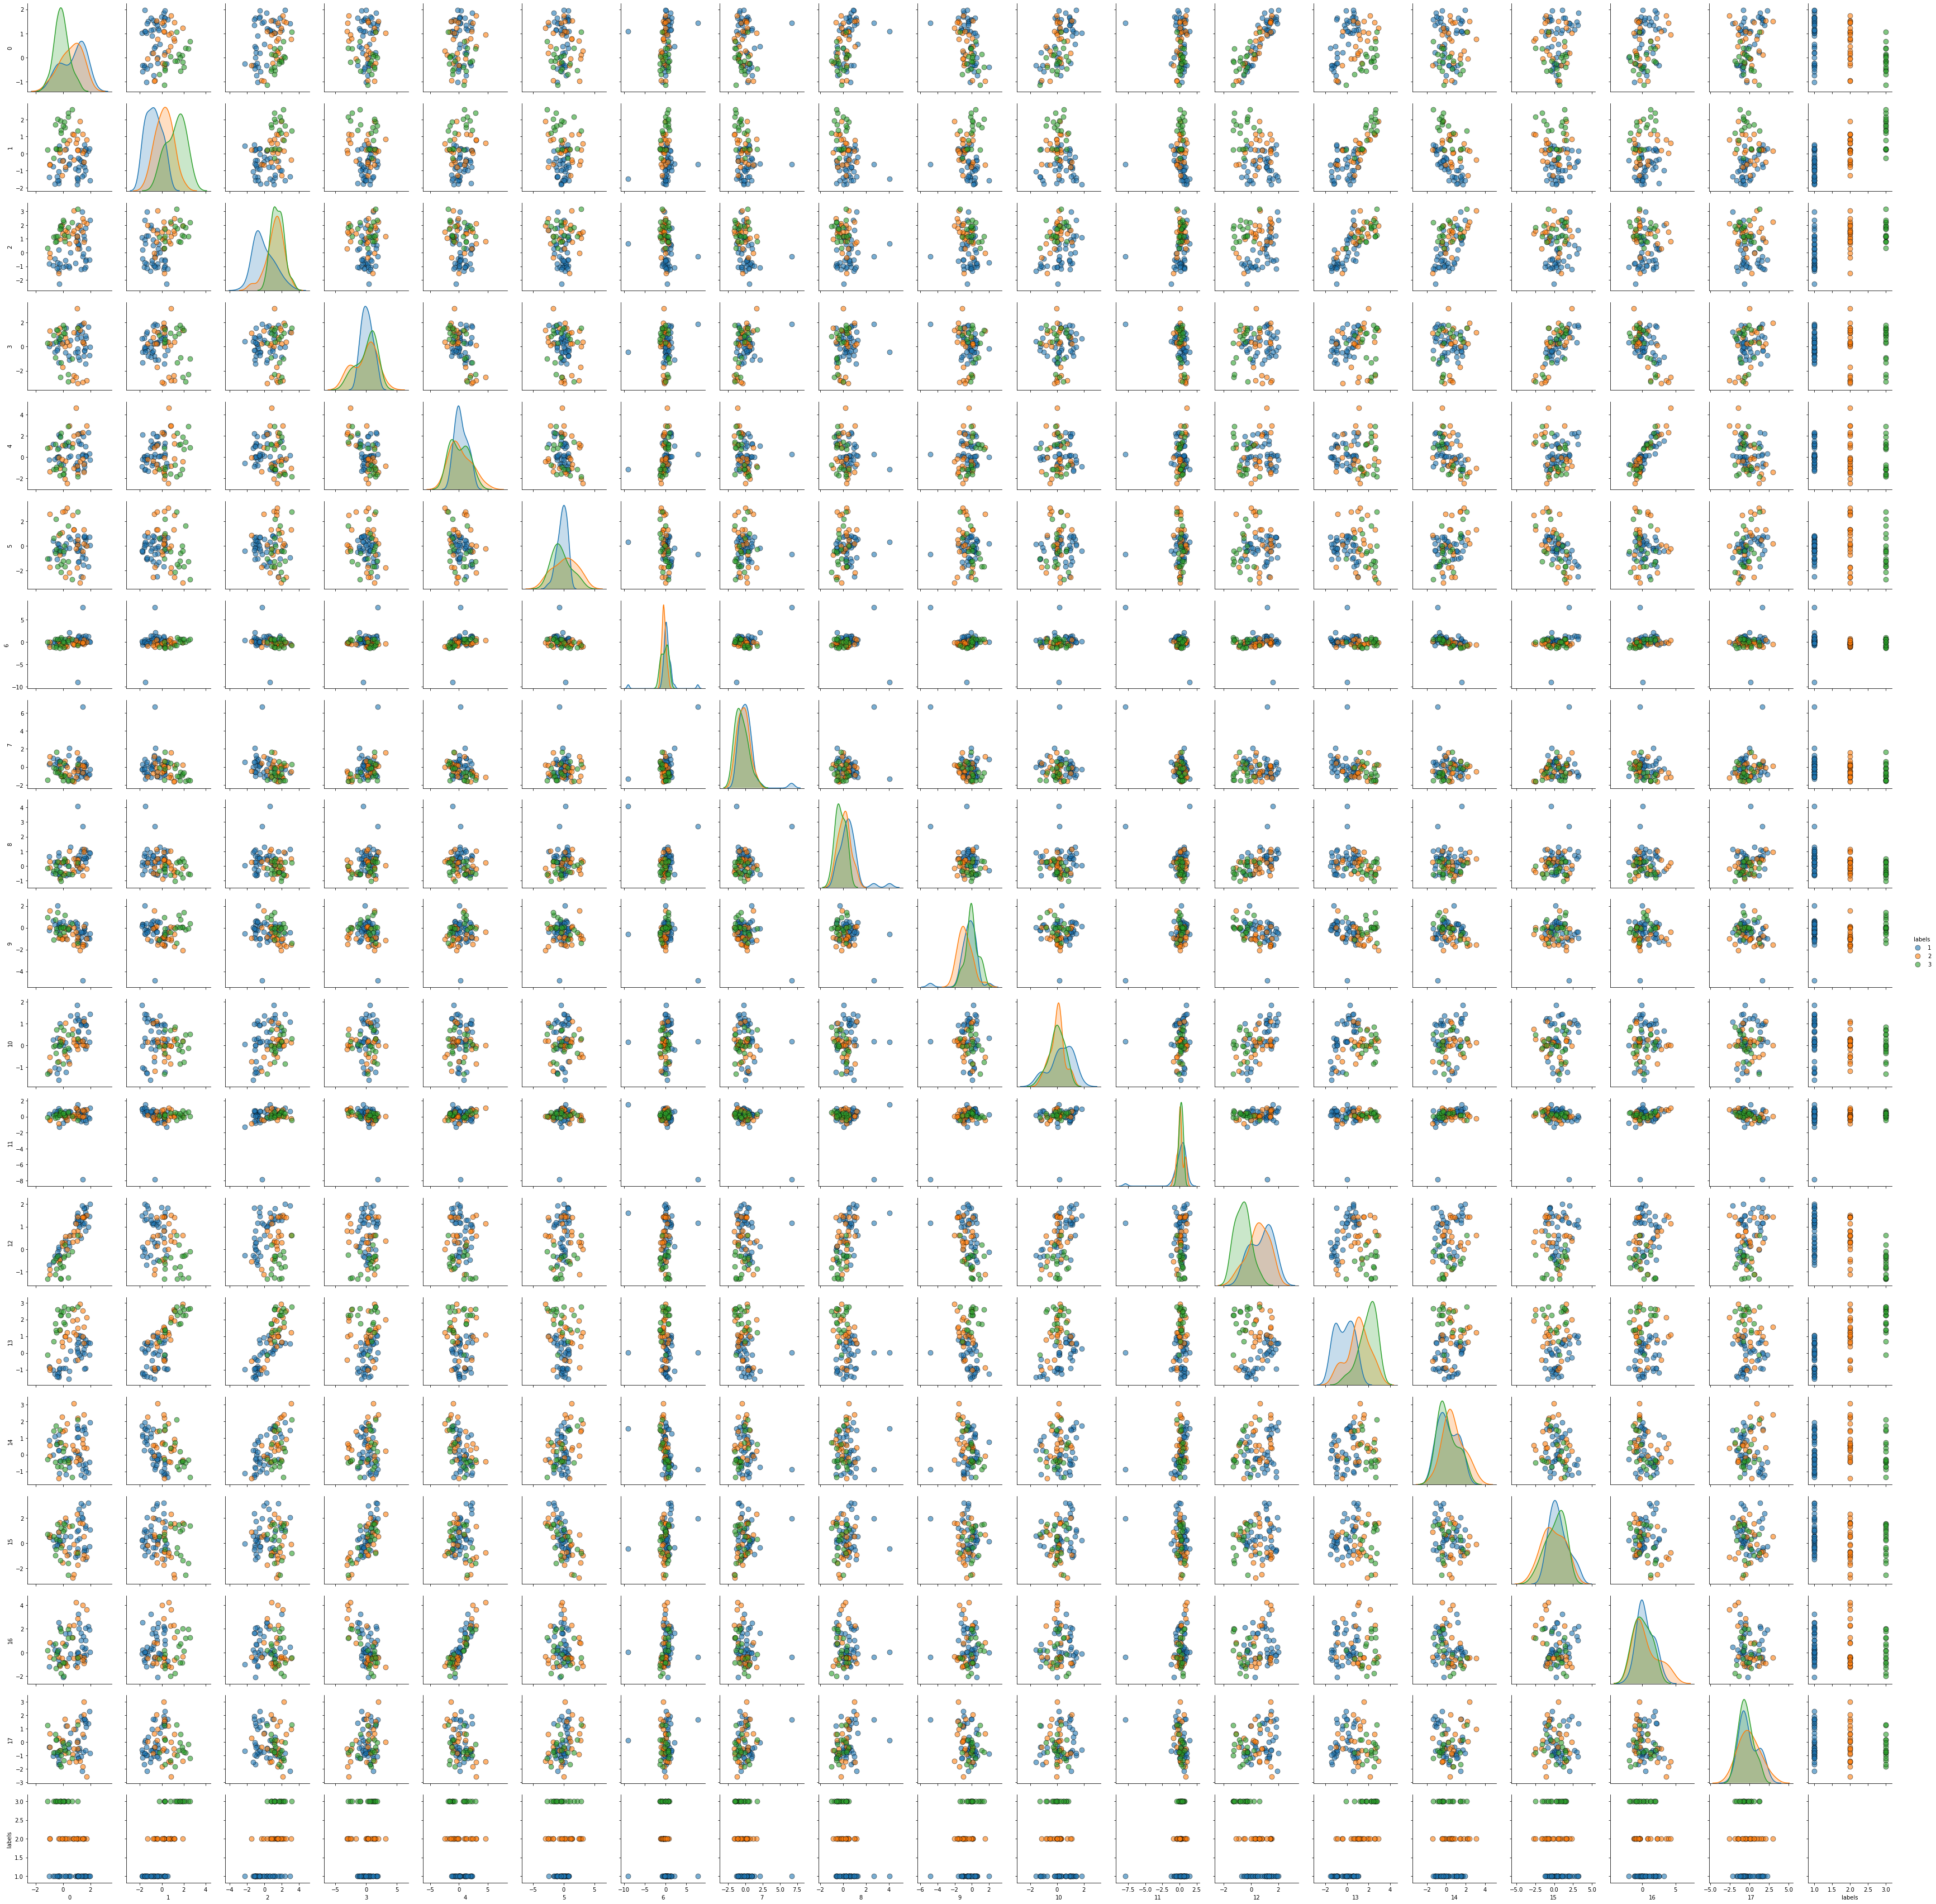

In [8]:
import seaborn as sns
df=df[df["labels"]!=0]
sns_fig=sns.pairplot(df,hue="labels", diag_kind = 'kde',
             plot_kws = {'alpha': 0.6, 's': 80, 'edgecolor': 'k'});
sns_fig.savefig("pairplot.png")

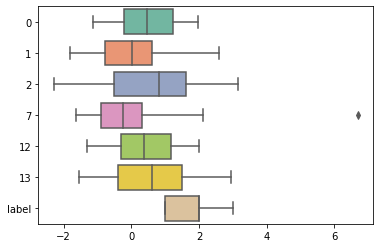

In [9]:
sns.boxplot(data=df_ufilter, orient="h", palette="Set2");

### Recursive Feature extraction using suport vector classification
(If they are easy to classify they are easy to cluster)

# Clustering

In [10]:
X=df_ufilter.iloc[:,:-1]
X

,0,1,2,7,12,13
25,-1.002604,-1.397988,-0.820913,0.281807,-0.701500,-0.828911
87,-0.261251,0.449861,-2.293847,0.536526,-0.282787,-0.988175
98,-0.736167,-0.754851,-0.921335,0.955647,-0.559839,-1.020603
105,-0.330326,0.227009,-1.492477,-0.432002,-0.553378,-0.470254
106,-0.324545,-1.587188,-1.064375,-0.582722,-0.009267,-1.385454
...,...,...,...,...,...,...
536,1.339142,-0.442747,1.621848,-1.070161,1.296522,1.010347
538,1.133379,-0.996474,1.982738,-0.207129,1.291079,0.637255
544,1.430036,0.018328,1.518319,-0.643814,1.442314,0.984489
554,1.449299,1.137328,2.491004,0.168394,1.401828,2.540308


# DBSCAN

### Selecting K-distance for K=5

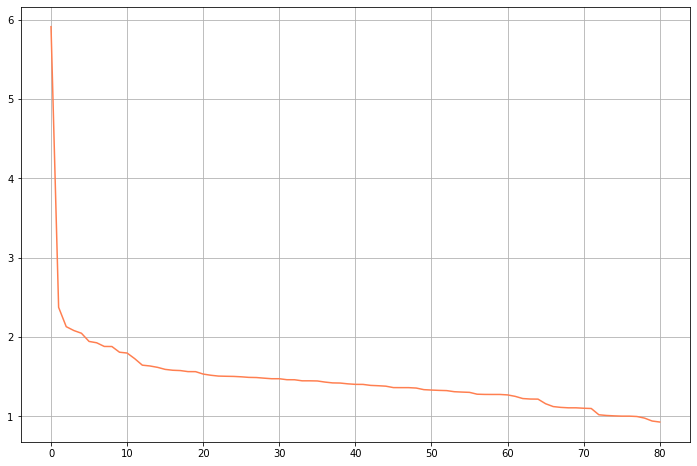

In [11]:
k=5
y_dummy=np.repeat(0,X.shape[0])

from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=k)
neigh.fit(X, y_dummy)

k_d=neigh.kneighbors(X)
Dist_df=pd.DataFrame(k_d[0])
dist_sorted=Dist_df.iloc[:,k-1].sort_values(ascending=False)
dist_sorted.index=np.arange(0,X.shape[0],1)
plt.figure(figsize=(12,8))
plt.grid()
#plt.axvline(45,ymin=0,ymax=1550/dist_sorted.max())
ax = sns.lineplot(data=dist_sorted, color="coral")

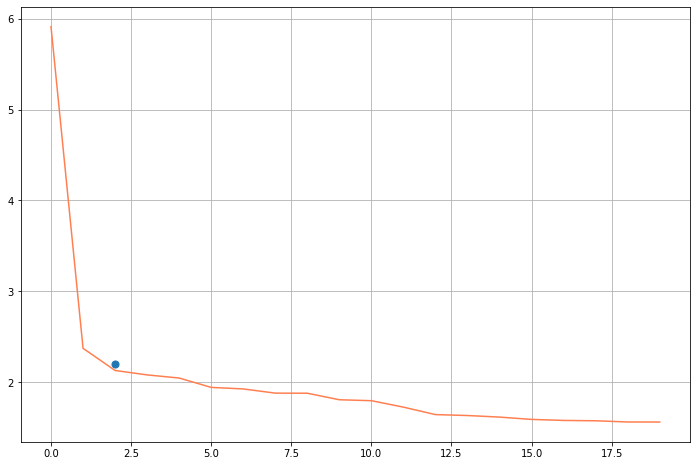

In [12]:
plt.figure(figsize=(12,8))
plt.grid()
plt.scatter(2, 2.2, s=50)
ax = sns.lineplot(data=dist_sorted[0:20], color="coral")

## Distance found of aproximately 1807 so we are going to use 1810 to make sure no center points are rejected

In [13]:
Distance=2.2

In [14]:
from sklearn.cluster import DBSCAN
clustering = DBSCAN(eps=Distance, min_samples=5).fit(X)
ids=X.index
labels=clustering.labels_
report_file="ex_labels.html"
report_clusters(ids, labels, report_file)

## K-Means

In [15]:
k=4
kmeans = KMeans(n_clusters=k).fit(X)
klab=kmeans.labels_
silhouette_score(X, klab, metric='euclidean')

0.33798102015953596

In [16]:
y=y[y!=0]

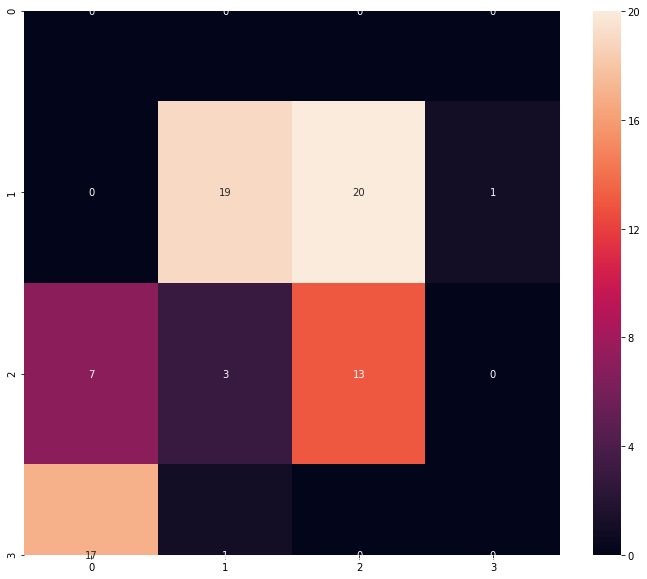

In [17]:
cm=confusion_matrix(y, klab)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True);

## Precision and recall

### DBSCAN

In [18]:
from sklearn.metrics import precision_recall_fscore_support

In [19]:
labels.shape

(81,)

In [20]:
Precision,recall,fscore,sup=precision_recall_fscore_support(y,labels)
PR_DBSCAN=pd.DataFrame([Precision,recall],columns=np.unique(y),index=["Precision","recall"])
PR_DBSCAN

/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/anaconda/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


ValueError: 3 columns passed, passed data had 5 columns

In [ ]:

Precision,recall,fscore,sup=precision_recall_fscore_support(y, klab)
PR_Kmeans=pd.DataFrame([Precision,recall],columns=np.unique(y),index=["Precision","recall"])
PR_Kmeans

In [ ]:
np.shape(labels)

### adjusted random score

In [ ]:
adjusted_rand_score(y,klab)